<div class="alert alert-block alert-success"> 
 Samsung Galaxy Watch Example
</div>

Load the libraries being used in the demo including the dill libray to pickle the data handler once they were loaded.

In [1]:
import dill as pickle
from cosinorage.datahandlers import GalaxyDataHandler, plot_enmo
from cosinorage.features import WearableFeatures, dashboard
from cosinorage.bioages import CosinorAge

%load_ext autoreload
%autoreload 2

Binary flag indicating if the data handler should be reloaded from the data files (True) or just loaded from the pickle file (False). When running the demo multiple times, it is recommended to set this to False to avoid reloading the data handler from the data files - however, please note that when running the notebook for the first time, it is important to set this to True to ensure that the data handler is loaded from the data files.

In [2]:
reload_galaxy = True

Determine the preprocess arguments for the GalaxyDataHandler. The arguments are used for the autocalibration procedure, the frequency filtering and the wear detection algorithm.

In [3]:
preprocess_args = {
    'autocalib_sd_criter': 0.01,
    'autocalib_sphere_crit': 0.02,
    'filter_type': 'lowpass',
    'filter_cutoff': 2,
    'wear_sd_crit': 0.00013,
    'wear_range_crit': 0.00067,
    'wear_window_length': 45,
    'wear_window_skip': 7,
}

Load the data from patient into the GalaxyDataHandler object from the data files which are located at the specified file directory.

In [4]:
if reload_galaxy:
    galaxy_handler = GalaxyDataHandler(galaxy_file_dir='../data/smartwatch/GalaxyWatch_Case1/', preprocess_args=preprocess_args, verbose=True)
    with open("pickle/galaxy_handler.pkl", "wb") as file:
        pickle.dump(galaxy_handler, file)
else:
    with open("pickle/galaxy_handler.pkl", "rb") as file:
        galaxy_handler = pickle.load(file)

Read 142 files from ../data/smartwatch/GalaxyWatch_Case1/
Loaded 12537000 accelerometer data records from ../data/smartwatch/GalaxyWatch_Case1/
Filtered out 1894214/10642786 accelerometer records due to filtering out first and last day
Filtered out 0/10642786 accelerometer records due to incomplete daily coverage
Filtered out 0/10642786 minute-level accelerometer records due to filtering for longest consecutive sequence of days
Resampled 10642786 to 10800000 timestamps
Calibration done
Noise removal done
Wear detection done
Wear time calculated
Calculated ENMO for 10800000 accelerometer records
Preprocessed accelerometer data
Aggregated ENMO values at the minute level leading to 7200 records
__load_data executed in 41.65 seconds


Printing out the metadata which was collected during data loading.

In [5]:
galaxy_handler.get_meta_data()

{'datasource': 'samsung galaxy smartwatch',
 'raw_n_datapoints': 12537000,
 'raw_start_datetime': Timestamp('2024-10-16 21:58:17.509000'),
 'raw_end_datetime': Timestamp('2024-10-22 21:59:52.495000'),
 'raw_data_frequency': '25Hz',
 'raw_data_type': 'accelerometer',
 'raw_data_unit': 'custom',
 'calibration_offset': array([-0.01739324,  0.00449154, -0.00464635]),
 'calibration_scale': array([0.99252398, 0.99404835, 0.989714  ]),
 'total_time': 431999.96,
 'wear_time': 405619.60000000003,
 'non-wear_time': 26380.359999999986}

Plotting the preprocessed ENMO data.

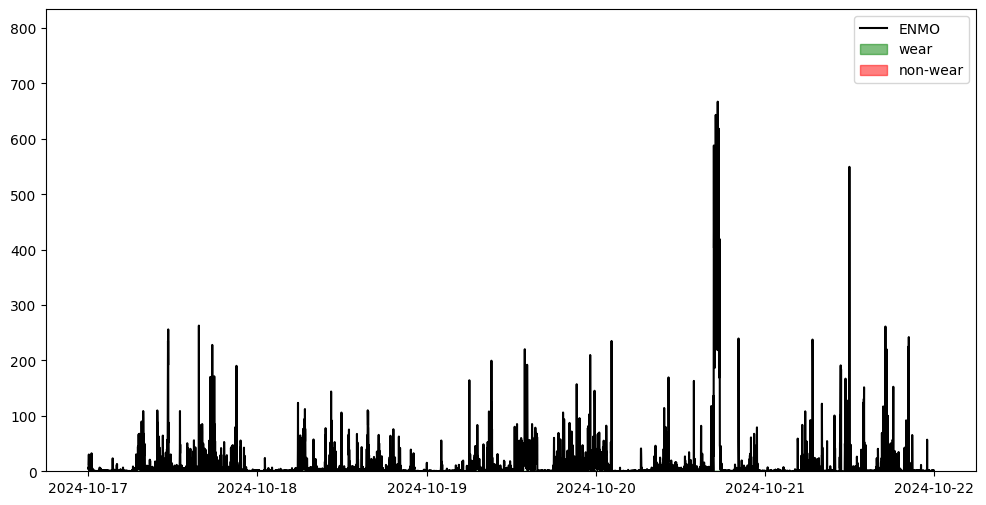

In [6]:
plot_enmo(galaxy_handler)

Setting hyperparameters for the sleep detection algorithm (sleep_ck_sf, sleep_rescore) and the cutpooint for the physical activity detection algorithm (pa_cutpoint_sl (cutpoint sedentary to light), pa_cutpoint_lm (cutpoint light to moderate), pa_cutpoint_mv (cutpoint moderate to vigorous)). sleep_ck_sf is a scale factor used in the sleep prediction algorithm - it needs to be adjusted depending on the data source and desired sensitivity of sleep detection.

In [7]:
features_args = {
    'sleep_ck_sf': 0.01,
    'sleep_rescore': True,
    'pa_cutpoint_sl': 15,
    'pa_cutpoint_lm': 35,
    'pa_cutpoint_mv': 70,
}

Compute a wide range of variable features and plot them in the dashboard below.

In [8]:
features = WearableFeatures(galaxy_handler, features_args)

done


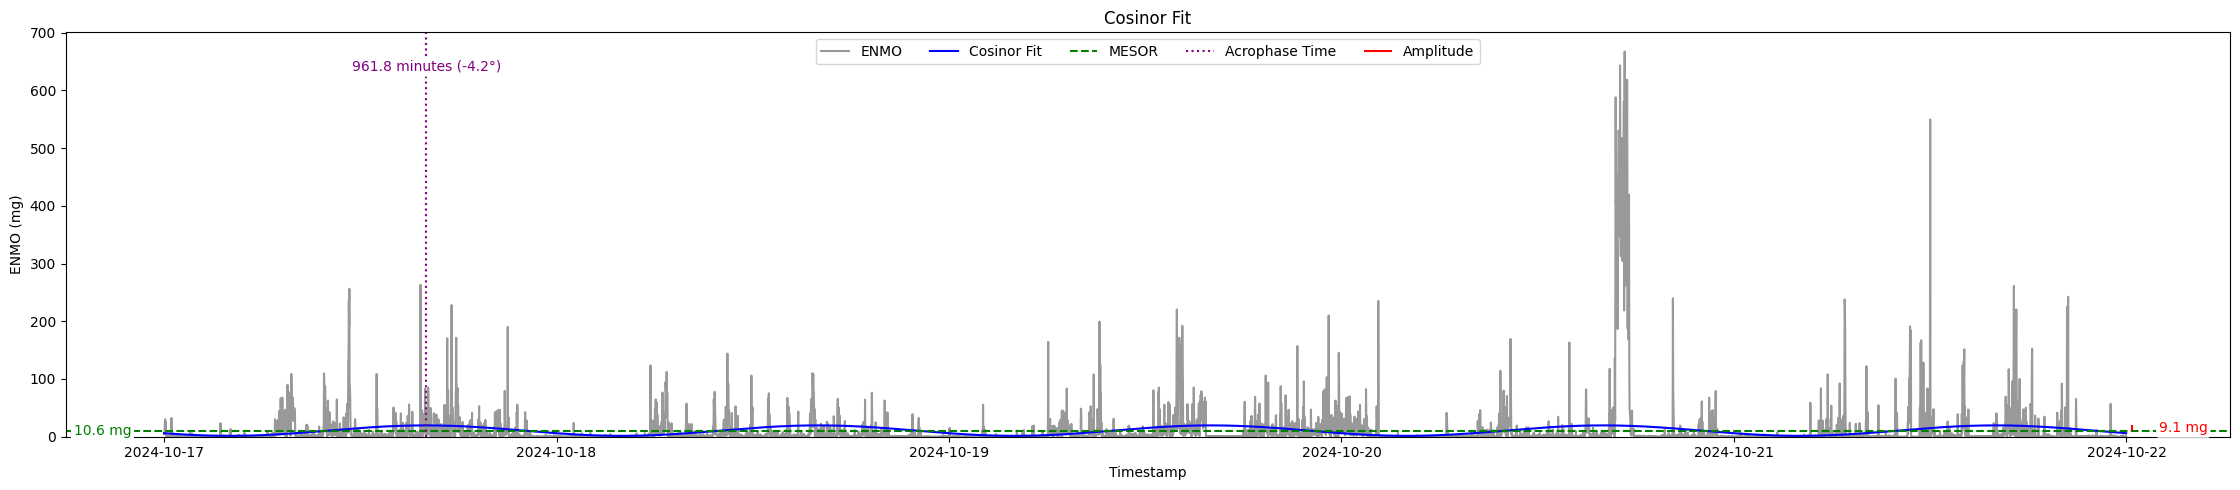

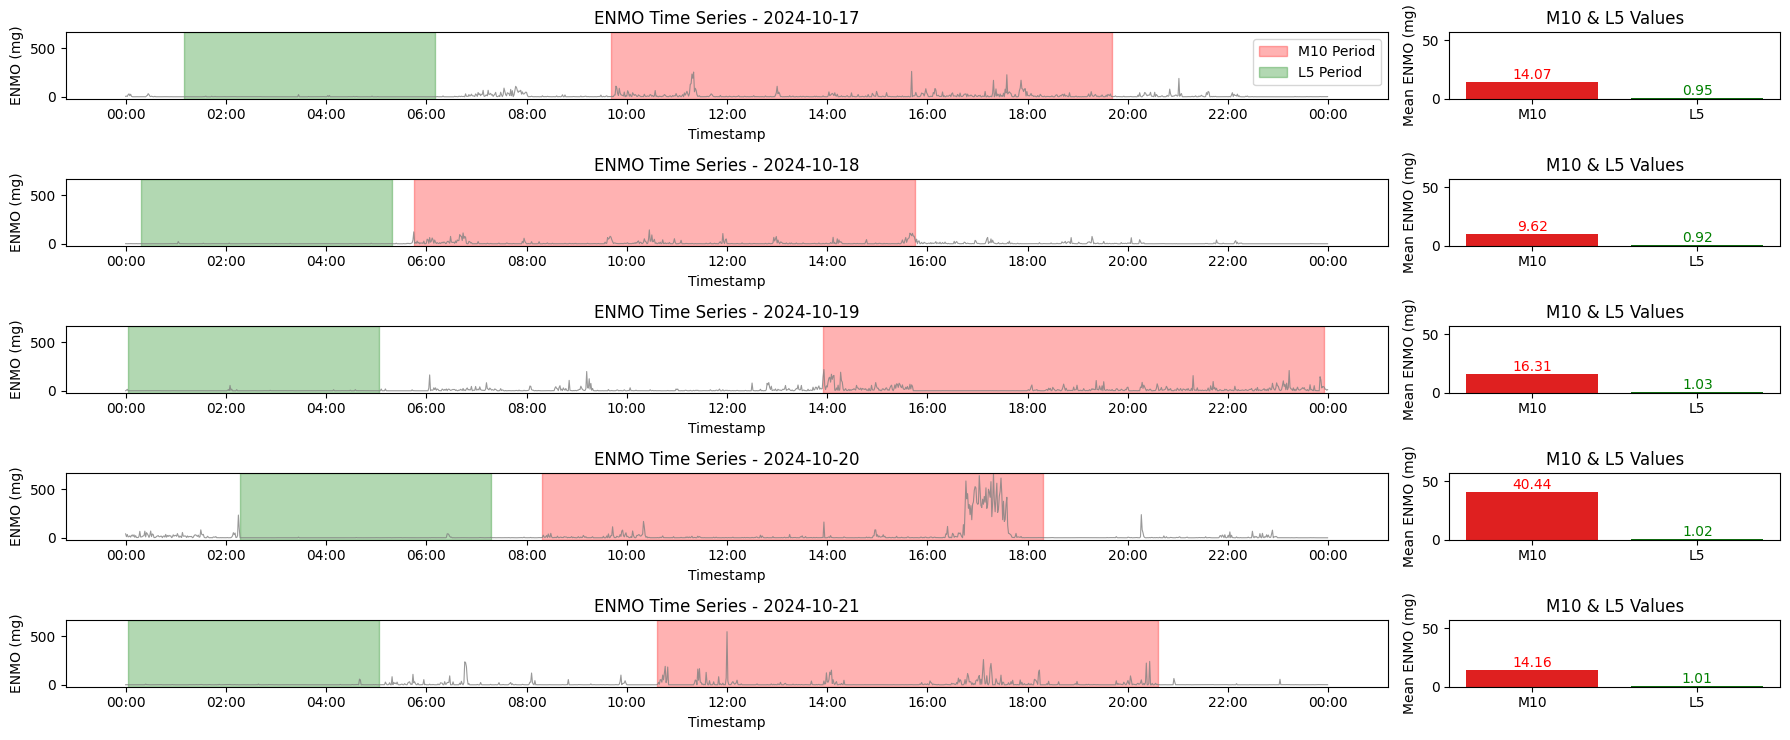

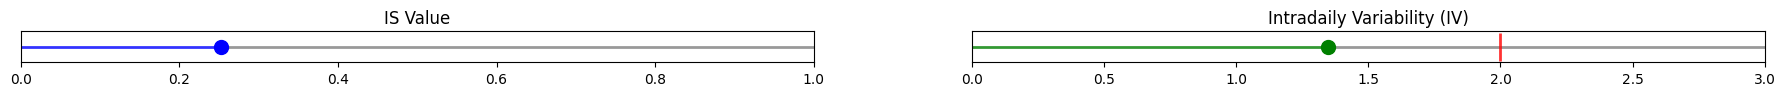

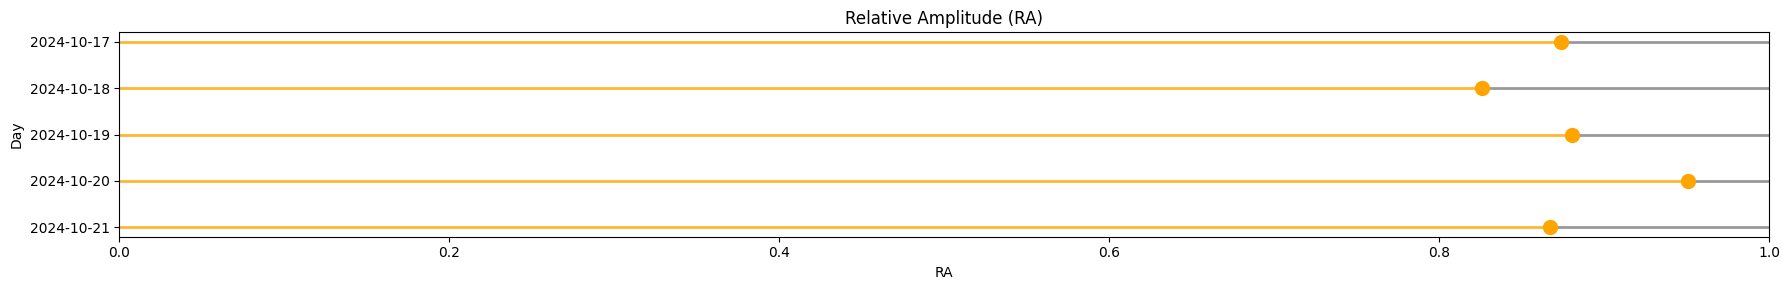

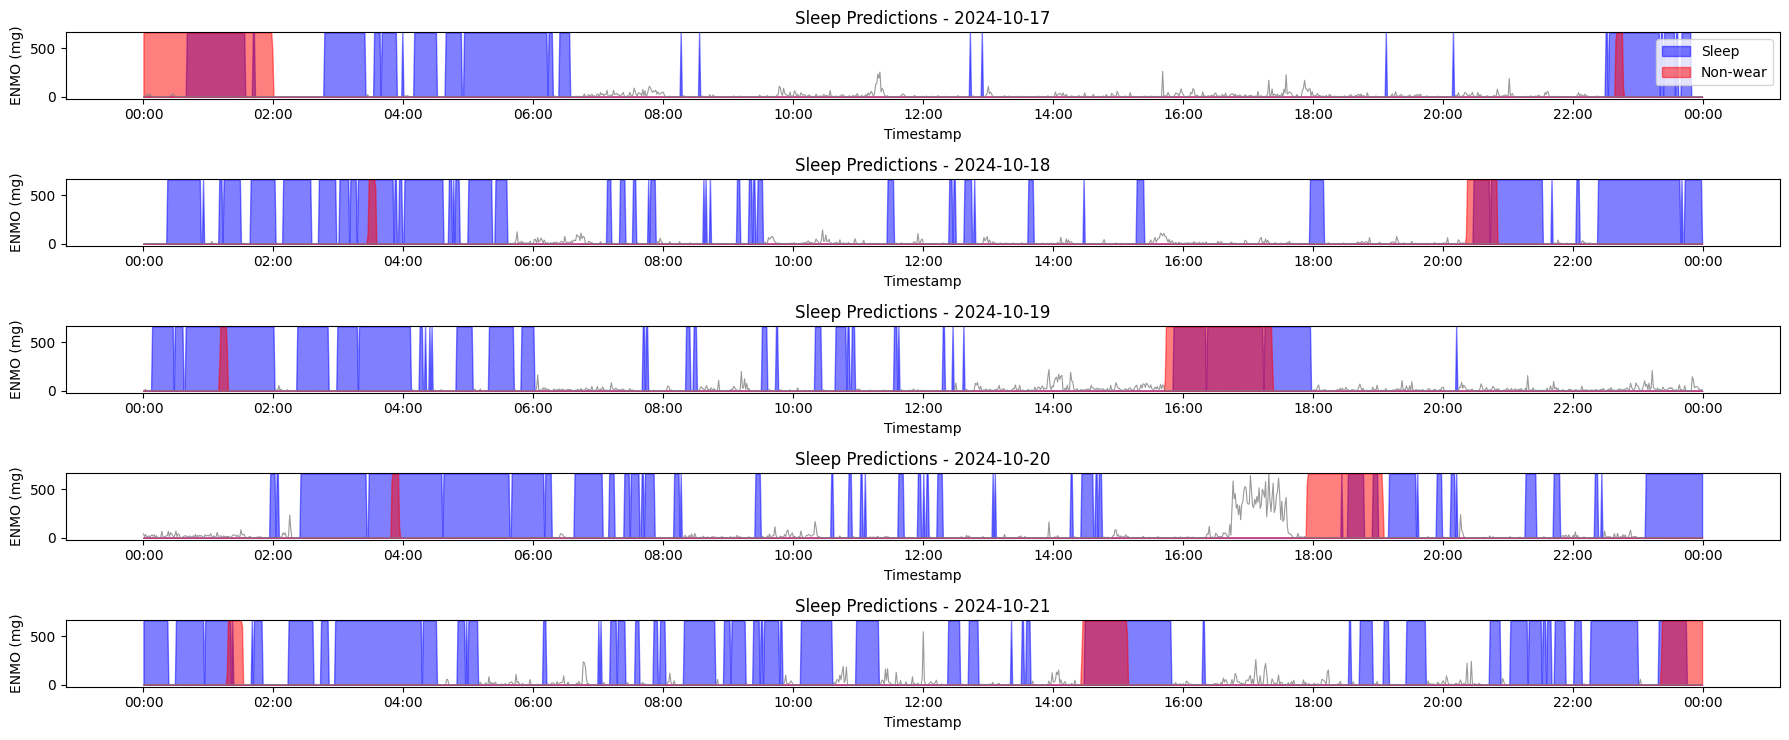

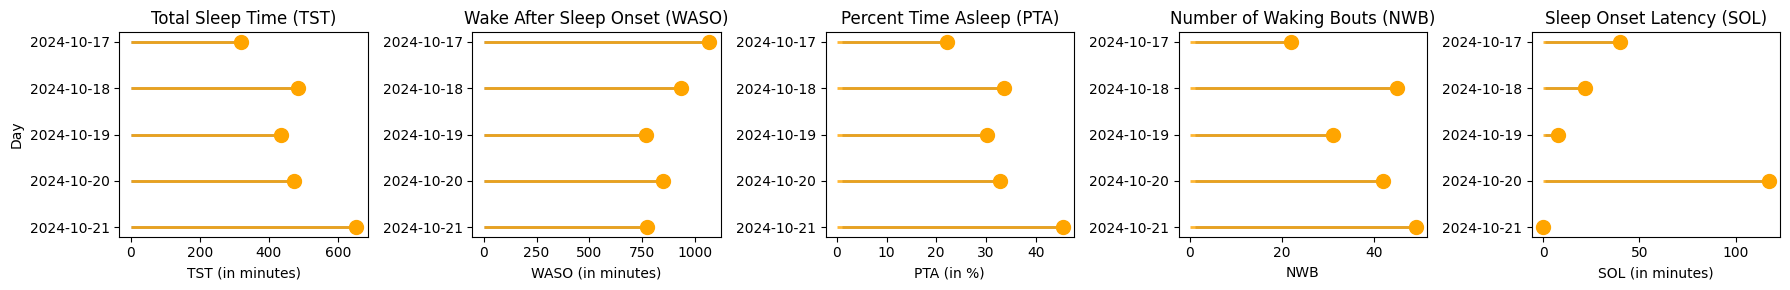

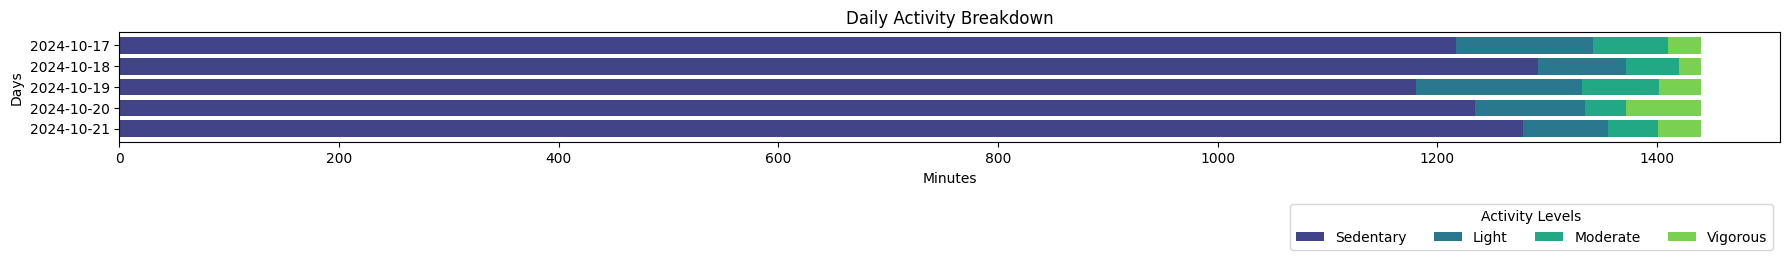

In [9]:
dashboard(features)